# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import math


In [2]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline


In [3]:
from IPython.display import Image

In [4]:
image0 = mpimg.imread('Speed limit (30).jpg')
image1 = mpimg.imread('Roundabout mandatory.jpg')
image2 = mpimg.imread('General caution.jpg')
image3 = mpimg.imread('Wild animals crossing.jpg')
image4 = mpimg.imread('Speed limit (50).jpg')
image5 = mpimg.imread('Speed limit (60).jpg')
image6 = mpimg.imread('Bicycles crossing.jpg')
image7 = mpimg.imread('Pedestrians.jpg')
image8 = mpimg.imread('Stop.jpg')
image9 = mpimg.imread('Turn right ahead.jpg')

In [5]:
my_test_X = np.array([image0, image1, image2, image3, image4, image5, image6, image7, image8, image9])
#my_test_y = np.array([ 1, 40, 18, 31, 2, 3, 29, 27, 14, 33], dtype=uint8)
my_test_y = np.array([ 1, 40, 18, 31, 2, 3, 29, 27, 14, 33])


In [6]:
# Load pickled data
import pickle
import numpy as np

# TODO: fill this in based on where you saved the training and testing data
training_file = "traffic-signs-data.zip/train.p"
testing_file = "traffic-signs-data.zip/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']


In [7]:

import cv2

def rbg_to_gray(array):
    
        #fs for features

        fs = []

        for i in range(0,array.shape[0]):

            image = array[i]

            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            fs.append(gray_image)
            
        return np.array(fs)


X_train = rbg_to_gray(X_train)

X_test = rbg_to_gray(X_test)

my_test_X =rbg_to_gray(my_test_X)

print (X_train.shape)

(39209, 32, 32)


In [8]:
# We know that MNIST images are 28 pixels in each dimension.
img_size = 32

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# Number of colour channels for the images: 1 channel for gray-scale.
num_channels = 1

# Number of classes, one class for each of 10 digits.
num_classes = 43



In [9]:

def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

### Visualization of 9 Random Training Images.

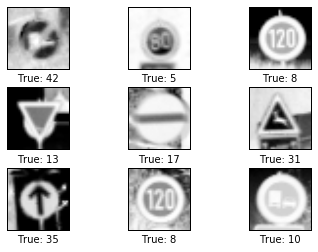

In [10]:
#Random selection of 9 images from X_train.
idx = np.random.randint(X_train.shape[0], size=9)
images = X_train[idx,:]
# Get the true classes for those images.
cls_true = y_train[idx]
# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

### Visualization of 9 Random Test Images.

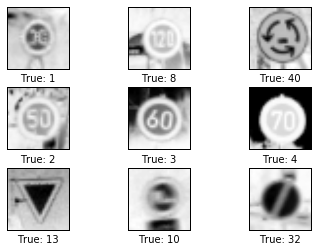

In [11]:
#Random selection of 9 images from X_test.
idx = np.random.randint(X_test.shape[0], size=9)
images = X_test[idx,:]
# Get the true classes for those images.
cls_true = y_test[idx]
# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

### Visualization of 9 my_test Images.

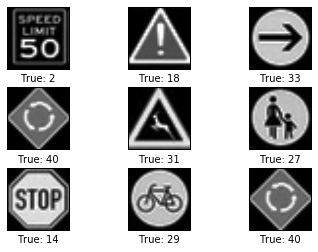

In [12]:
#Random selection of 9 images from my_test_X.
idx = np.random.randint(my_test_X.shape[0], size=9)
images = my_test_X[idx,:]
# Get the true classes for those images.
cls_true = my_test_y[idx]
# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

### Data Counts

In [13]:
### To start off let's do a basic data summary.

# TODO: number of training examples
n_train = X_train.shape[0]

# TODO: number of testing examples
n_test = X_test.shape[0]

# TODO: number of testing examples
n_my_test = my_test_X.shape[0]

# TODO: what's the shape of an image?
image_shape = X_train.shape[1:3]

# TODO: how many classes are in the dataset
n_classes = len(set(train['labels']))
# TODO: how many classes are in the dataset
n_classes2 = len(set(test['labels']))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of my_test examples =", n_my_test)
print("Image data shape =", image_shape, 32*32)
print("Number of classes =", n_classes, )



Number of training examples = 39209
Number of testing examples = 12630
Number of my_test examples = 10
Image data shape = (32, 32) 1024
Number of classes = 43


In [14]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
#import collections

#print (type(train['labels']))
#print (type(collections.Counter(train['labels'])))
#print (collections.Counter(train['labels']))
#train_label_count = collections.Counter(train['labels'])
#x=dict(collections.Counter(train['labels']))
#print (type(x))
#print (collections.OrderedDict(sorted(x.items(), key=lambda t: t[0])))
#print (type(test['labels']))
#print (type(collections.Counter(test['labels'])))
#print (collections.Counter(test['labels']))
#y=dict(collections.Counter(test['labels']))
#print (type(y))
#print (collections.Counter(train['labels']).most_common)
#print (collections.OrderedDict(sorted(y.items(), key=lambda t: t[0])))


### Visualization of Count of Training Samples by Sign Type Index

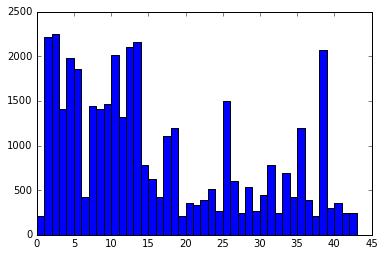

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import collections
%matplotlib inline

train_label_count = collections.Counter(train['labels'])
labels, values = zip(*train_label_count.items())
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.show()


### Visualization of Count of Test Samples by Sign Type Index

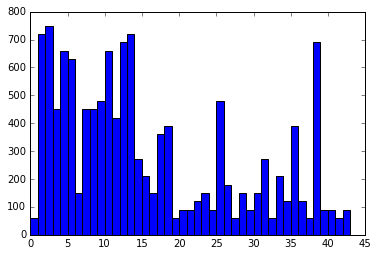

In [16]:
test_label_count = collections.Counter(test['labels'])

#print (test_label_count, type(test_label_count))
labels, values = zip(*test_label_count.items())
#print(labels, values)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.show()

It would be interesting to see if the signs with more examples, below index 19, for training had a better prcictive accuracy than the examples with fewer samples, index of 19 or above. 


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [17]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

import hashlib
import os
import pickle
from urllib.request import urlretrieve

import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import resample
from tqdm import tqdm
from zipfile import ZipFile

print('All modules imported.')



All modules imported.


In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import math


In [19]:


def flatten_gray(array):
    
        #fs for features

        fs = []
        
        for i in range(0,array.shape[0]):
        
            image = array[i]

            f = np.array(image, dtype=np.float32).flatten()

            fs.append(f)

        return np.array(fs) 
    
X_train = flatten_gray(X_train)

X_test = flatten_gray(X_test)

my_test_X =flatten_gray(my_test_X)



In [20]:
def normalize_greyscale(image_data):
    a= 0.1
    b= 0.9
    min = 0
    max =255
    #value = 0.1 + ((image_data- min)*(b-a))/(max-min)
    greyscale_min = 0
    greyscale_max = 255
    return a + ( ( (image_data - greyscale_min)*(b - a) )/( greyscale_max - greyscale_min ) )

X_train = normalize_greyscale(X_train)
X_test = normalize_greyscale(X_test)
my_test_X = normalize_greyscale(my_test_X)

In [21]:
import hashlib
import os
import pickle
from urllib.request import urlretrieve

import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import resample
from tqdm import tqdm
from zipfile import ZipFile


# Turn labels into numbers and apply One-Hot Encoding
encoder = LabelBinarizer()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)
my_test_y = encoder.transform(my_test_y)

# Change to float32, so it can be multiplied against the features in TensorFlow, which are float32
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)
my_test_y = my_test_y.astype(np.float32)

#print('Labels One-Hot Encoded')

In [22]:
# Get randomized datasets for training and validation


X_train, X_valid, y_train, y_valid = train_test_split(
    
    X_train,
    
    y_train,
    
    test_size=0.15,
    
    random_state=832289)


print('Training features and labels randomized and split.')

Training features and labels randomized and split.


In [23]:
import tensorflow as tf
sess = tf.InteractiveSession()

In [24]:
#None is the batch size
x = tf.placeholder(tf.float32, shape=[None, 1024])
y_ = tf.placeholder(tf.float32, shape=[None, 43])

In [25]:
W = tf.Variable(tf.zeros([1024,43]))
b = tf.Variable(tf.zeros([43]))

In [26]:
#sess.run(tf.initialize_all_variables())

In [27]:
#y = tf.matmul(x,W) + b

In [28]:
#cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, y_))

In [29]:
##train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
#train_step = tf.train.GradientDescentOptimizer(0.09).minimize(cross_entropy)
#batch_size=1000

#for i in range(1000):
    
#  batch_start = i*batch_size
#  batch_features = X_train[batch_start:batch_start + batch_size]
#  batch_labels = y_train[batch_start:batch_start + batch_size]  
    
#  #print(X_train.shape)  
    
    
#  #batch = mnist.train.next_batch(100)
#  #print(batch)
#  #train_step.run(feed_dict={x: batch[0], y_: batch[1]})  
#  train_step.run(feed_dict={x: batch_features, y_: batch_labels})
    
    
#correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

In [30]:
#accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [31]:
#print(accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
#print(accuracy.eval(feed_dict={x: X_test, y_: y_test}))

In [32]:
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

In [33]:
def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')


In [34]:
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

In [35]:
x_image = tf.reshape(x, [-1,32,32,1])
#x_image = tf.reshape(x, [-1,28,28,1])

In [36]:
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

In [37]:
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
#print(h_conv2)
h_pool2 = max_pool_2x2(h_conv2)
#print(h_pool2)

In [38]:
W_fc1 = weight_variable([8 * 8 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 8*8*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

In [39]:
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

In [40]:
W_fc2 = weight_variable([1024, 43])
b_fc2 = bias_variable([43])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

In [41]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y_conv, y_))
train_step = tf.train.AdamOptimizer(8.8e-4).minimize(cross_entropy)
#above with 40bach
#train_step = tf.train.AdamOptimizer(9e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(tf.initialize_all_variables())

In [42]:
import datetime


batch_size=40#40
total_samples = X_train.shape[0]
epochs = 5

#Loops (at batch size) to get through data once.
loops = int(total_samples / batch_size) 

print("Start ",datetime.datetime.now().time())

for i in range(epochs):
    #for j in range(800):
    for j in range(loops):
      #batch_size=40

      #print(X_train.shape, y_train.shape)


      batch_start = j*batch_size
      batch_features = X_train[batch_start:(batch_start + batch_size)]
      batch_labels = y_train[batch_start:(batch_start + batch_size)] 



      #batch = mnist.train.next_batch(50)

      #print(batch[0].shape, batch[1].shape)

      if j%100 == 0:
        train_accuracy = accuracy.eval(feed_dict={
            x:batch_features, y_: batch_labels, keep_prob: 1.0})
            #x: X_train[0:50], y_: y_train[0:50], keep_prob: 1.0})  
        print("step %d, training accuracy %g, batch start %d"%(j, train_accuracy, batch_start))

    #  print(batch_features)
    #  print(type(batch_features))
    #  print(batch_features.shape)

    #  print(batch_labels)   
    #  print(type(batch_labels))
    #  print(batch_labels.shape)    


      train_step.run(feed_dict={x: batch_features, y_: batch_labels, keep_prob: 0.5})

    print("valid accuracy %g"%accuracy.eval(feed_dict={
    #    x: X_test, y_: y_test, keep_prob: 1.0}))    

        x: X_valid, y_: y_valid, keep_prob: 1.0}))

    
    
print("test accuracy %g"%accuracy.eval(feed_dict={    
    x: X_test, y_: y_test, keep_prob: 1.0}))    

print ("Finished ", datetime.datetime.now().time())


Start  20:08:43.022518
step 0, training accuracy 0, batch start 0
step 100, training accuracy 0.45, batch start 4000
step 200, training accuracy 0.625, batch start 8000
step 300, training accuracy 0.6, batch start 12000
step 400, training accuracy 0.8, batch start 16000
step 500, training accuracy 0.725, batch start 20000
step 600, training accuracy 0.825, batch start 24000
step 700, training accuracy 0.875, batch start 28000
step 800, training accuracy 0.925, batch start 32000
valid accuracy 0.932676
step 0, training accuracy 0.925, batch start 0
step 100, training accuracy 0.975, batch start 4000
step 200, training accuracy 0.95, batch start 8000
step 300, training accuracy 1, batch start 12000
step 400, training accuracy 1, batch start 16000
step 500, training accuracy 0.925, batch start 20000
step 600, training accuracy 1, batch start 24000
step 700, training accuracy 0.95, batch start 28000
step 800, training accuracy 0.975, batch start 32000
valid accuracy 0.960728
step 0, traini

In [ ]:
#print("test accuracy %g"%accuracy.eval(feed_dict={
#    x: my_test_X, y_: my_test_y, keep_prob: 1.0}))

In [43]:
pwd

'/Users/williamkapsalis/version-control/sdcnd/traffic-signs-master'

### Question 1 

_Describe the techniques used to preprocess the data._


**Answer:** The techniques I used to preprocess the data were to convert the data to gray, flatten the image from 32 by 32 pixels to 1024 pixels. Then the data was normalized to the formula value = 0.1 + ((image_data- min)*(b-a))/(max-min). 

In [ ]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.


### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:** The labels of the given train and test samples were converted to numbers and One-Hot Encoding was added. Also, the training set was randomly split into a training and validation groups. The percent of the split was tested at a validation set being 30%, 20%, 10% and 5%.

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.



### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** The architecture I used was a Convoluted Neural network with EDIT LATER !!!!!!!hidden layer. Each of the hidden layer had 256 features. The labels of the training, validation and testing were converted form sign type to a numbers and One-Hot Encoding added.

In [ ]:
### Train your model here.
### Feel free to use as many code cells as needed.


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**  I tried using  tf.train.GradientDescentOptimizer() and the tf.train.AdamOptimizer() optimizer function but AdamOptimizer in the convolutional neural network had the best results. Also, I ended up with a batch size of 40, epochs of 50, set here at 5. Hyperparameters....


I used a grid search to find the best learning rate and batch size. I tested first tested learning rates of (1e-5, 1e-4, 1e-3, 1e-2, 1e-1) and batch sizes of (25, 50, 100, 200, 500). Then I tried a few at different epochs to make sure the learning rate was not leveling of at a high error

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:** I used many methods, and to many hours training my model. I addaped the code from the mnist lab, the convoutional network lecture videos and tensorFlow tutorial 'Deep MNIST for Experts' to make my model.First I made a deep neural net then a convoluted neural net with drop out and pooling after adapting it to the traffic sign data.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.


### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

### Sources

1 https://www.tensorflow.org/versions/r0.11/tutorials/mnist/pros/index.html#train-the-model